In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [130]:
#!pip install sklego


In [131]:
#Load the dataset
df = pd.read_csv("data.csv")
df.shape

(98000, 30)

In [132]:
#Print the shape of data
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [133]:
col_select = []
alpha = 0.05

for col in df:
    _, p_value = stats.shapiro(df[col])
    if (p_value <= alpha):
        col_select.append(col)
data = df[col_select]

In [134]:
print(data.shape)
data.head()

(98000, 15)


,id,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,2,13,14,5,13,6,6,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,2,3,6,4,6,16,9,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,5,11,5,8,9,3,11,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,6,2,13,8,9,6,4,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,8,7,5,3,1,13,11,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


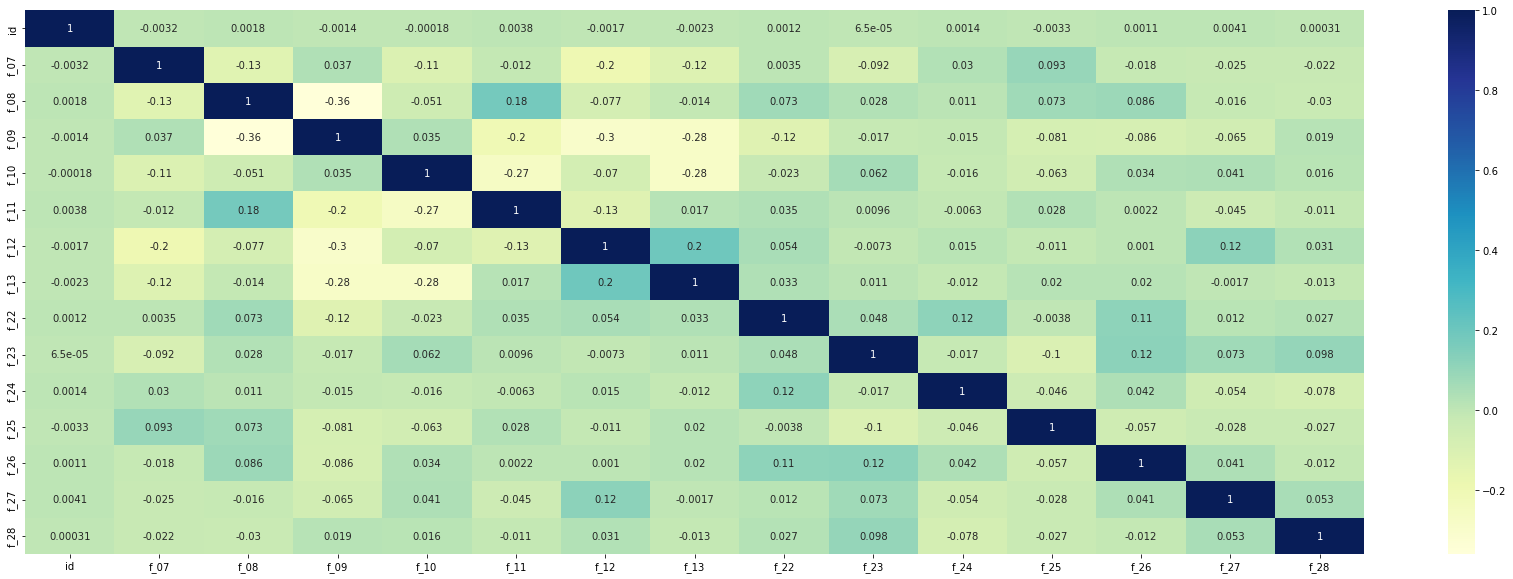

In [135]:
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True);

In [136]:
#X = data.drop("id", axis=1, inplace=False)
#X = df.drop(["id"], axis=1, inplace=True) # this is not working 


In [137]:
#X

In [138]:
from sklearn.preprocessing import PowerTransformer
data = PowerTransformer().fit_transform(data)
data = pd.DataFrame(data, columns=col_select)
data.head()

,id,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-2.196170,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-2.195469,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,-2.194869,0.021718,1.017648,-0.394246,0.124844,0.296135,-0.928325,1.118063,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,-2.194325,0.286548,-1.213526,0.917564,0.124844,0.296135,-0.083596,-0.434221,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,-2.193820,0.756900,0.187543,-0.394246,-1.135381,-1.954502,1.271662,1.118063,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


In [139]:
# data = data.drop("id", axis=1, inplace=False)
# data.head()

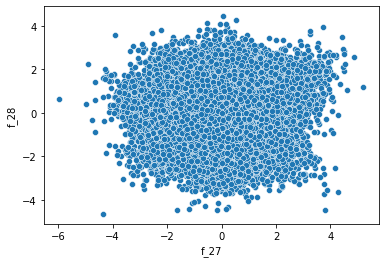

In [140]:
#let's check the spread of the dataset
sns.scatterplot(data=data, x='f_27', y='f_28');

In [141]:
from sklearn.mixture import BayesianGaussianMixture
cls_gaussian = BayesianGaussianMixture(n_components=7, tol=0.001, init_params='kmeans', n_init=5)
predict1 = cls_gaussian.fit_predict(data)

In [142]:
predict1

array([2, 6, 2, ..., 3, 5, 6], dtype=int64)

In [143]:
data['Predicted_1'] = predict1
data['Predicted_1'].value_counts()

submittion = pd.read_csv('sample_submission.csv')
submittion["Predicted"] = predict1
submittion.to_csv('submittion_1.csv', index=False)

In [144]:
# from sklearn.mixture import BayesianGaussianMixture
# cls_gaussian= BayesianGaussianMixture(n_components=7,tol=0.001,init_params='kmeans',n_init=5)
# predict1 = cls_gaussian.fit_predict(data)

from sklego.mixture import BayesianGMMClassifier
bgmmC = BayesianGMMClassifier(n_components=7, covariance_type='full', max_iter=500, n_init=4 )
bgmmC.fit(data, predict1)
predict_2 = bgmmC.predict(data)

In [145]:
data['Predicted'] = predict_2
data['Predicted'].value_counts()

1    22959
6    21661
2    14003
3    13159
0    12948
5    10649
4     2621
Name: Predicted, dtype: int64

<AxesSubplot:xlabel='f_23', ylabel='f_24'>

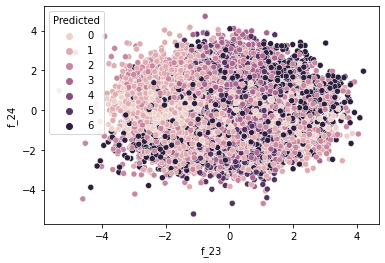

In [146]:
sns.scatterplot(x='f_23',y='f_24',hue='Predicted',legend='full',data=data)

<AxesSubplot:xlabel='f_23', ylabel='f_28'>

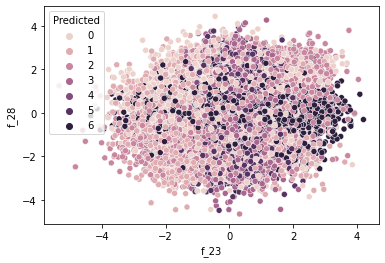

In [147]:
sns.scatterplot(x='f_23',y='f_28',hue='Predicted',legend='full',data=data)

In [148]:
submittion = pd.read_csv('sample_submission.csv')
submittion["Predicted"] = predict_2
submittion.to_csv('submittion-2.csv', index=False)